Creation of FRED API Call

In [52]:
import pandas as pd
import requests
import os
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import yfinance as yf

In [53]:
API_KEY = os.environ["FRED_API_KEY"]

In [54]:
def fetch_fred_data(series_id, start_date, end_date):
   
    # FRED API URL
    url = f'https://api.stlouisfed.org/fred/series/observations'

    # Parameters for the API request
    params = {
        'series_id': series_id,
        'api_key': API_KEY,
        'file_type': 'json',
        'frequency': 'm',
        'observation_start': start_date,
        'observation_end': end_date,
    }

    # Sending the request to the FRED API
    response = requests.get(url, params=params)
    data = response.json()

    # Check for errors
    if 'observations' not in data:
        print(f"Error fetching data for {series_id}: {data.get('error_message', 'Unknown error')}")
        return pd.DataFrame()

    # Extract observations
    observations = data['observations']
    
    # Convert to DataFrame
    df = pd.DataFrame(observations)
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert values to numeric

    # Select relevant columns
    df = df[['date', 'value']]
    
    return df

In [55]:
#Define Date Range
start_date = date.today() - timedelta(days=5*365.24)
end_date = date.today()
print(start_date, end_date)

2019-09-25 2024-09-24


In [56]:
#Fetch Unemployment Rate (UNRATE) data
unemployment_series_id = 'UNRATE' 

# Fetch data
fetched_unemployment_data = fetch_fred_data(unemployment_series_id, start_date, end_date)


In [57]:
#Fetch Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUSCL) data from 2020-01-01 to 2024-01-01
CPI_series_id = 'CPIAUCSL'

# Fetch data
fetched_cpi_data = fetch_fred_data(CPI_series_id, start_date, end_date)

In [58]:
#Fetch 3 Month Treasury Bill Rates
threemonth_tbill_series_id = 'TB3MS'

# Fetch data
fetched_threemonth_tbill_data = fetch_fred_data(threemonth_tbill_series_id, start_date, end_date)

In [59]:
#Fetch 6 Month Treasury Bill Rates
sixmonth_tbill_series_id = 'TB6MS'

# Fetch data
fetched_sixmonth_tbill_data = fetch_fred_data(sixmonth_tbill_series_id, start_date, end_date)

In [60]:
#Fetch 6 Month Treasury Bill Rates
sixmonth_tbill_series_id = 'TB6MS'

# Fetch data
fetched_sixmonth_tbill_data = fetch_fred_data(sixmonth_tbill_series_id, start_date, end_date)

In [61]:
#Fetch BBB ICE BofA Index Effective Yield
BBB_series_id = 'BAMLC0A4CBBBEY'

# Fetch data
fetched_BBB_data = fetch_fred_data(BBB_series_id, start_date, end_date)

In [62]:
#Fetch BBB ICE BofA Index Effective Yield
sp500_series_id = 'SP500'

# Fetch data
fetched_sp500_data = fetch_fred_data(sp500_series_id, start_date, end_date)

In [63]:
#Get VIX Data
ticker_string = "^VIX"

#Fetch historical market data
fetched_VIX_data = yf.download(ticker_string, start_date, end_date, interval="1mo")
fetched_VIX_data = fetched_VIX_data.drop(columns=["High","Low","Close","Adj Close","Volume"])

[*********************100%***********************]  1 of 1 completed


In [64]:
#Data Cleaning
unemployment_data = fetched_unemployment_data.set_index('date')
unemployment_data.index = pd.to_datetime(unemployment_data.index)
unemployment_data = unemployment_data.rename(columns={'value': 'Unemployment Rate'})

cpi_data = fetched_cpi_data.set_index('date')
cpi_data.index = pd.to_datetime(cpi_data.index)
cpi_data = cpi_data.rename(columns={'value': 'CPI'})

threemonth_tbill_data = fetched_threemonth_tbill_data.set_index('date')
threemonth_tbill_data.index = pd.to_datetime(threemonth_tbill_data.index)
threemonth_tbill_data = threemonth_tbill_data.rename(columns={'value': 'Three Month T Bill Rate'})

sixmonth_tbill_data = fetched_sixmonth_tbill_data.set_index('date')
sixmonth_tbill_data.index = pd.to_datetime(sixmonth_tbill_data.index)
sixmonth_tbill_data = sixmonth_tbill_data.rename(columns={'value': 'Six Month T Bill Rate'})

BBB_data = fetched_BBB_data.set_index('date')
BBB_data.index = pd.to_datetime(BBB_data.index)
BBB_data = BBB_data.rename(columns={'value': 'BBB Rate'})

sp500_data = fetched_sp500_data.set_index('date')
sp500_data.index = pd.to_datetime(sp500_data.index)
sp500_data = sp500_data.rename(columns={'value': 'SP500 Index'})

VIX_data = fetched_VIX_data
VIX_data.index = pd.to_datetime(VIX_data.index)
VIX_data = VIX_data.rename(columns={'Open': 'VIX Open'})
VIX_data


,VIX Open
Date,
2019-10-01,16.020000
2019-11-01,12.500000
2019-12-01,12.690000
2020-01-01,13.460000
2020-02-01,18.639999
2020-03-01,38.540001
2020-04-01,57.380001
2020-05-01,38.169998
2020-06-01,28.940001


In [69]:
# Merge dataframes together one by one
merged_data = pd.merge(unemployment_data, cpi_data, on='date')
merged_data = pd.merge(merged_data, threemonth_tbill_data, on='date')
merged_data = pd.merge(merged_data, sixmonth_tbill_data, on='date')
merged_data = pd.merge(merged_data, BBB_data, on='date')
merged_data = pd.merge(merged_data, sp500_data, on='date')
#merged_data = pd.merge(merged_data, VIX_data, left_index=True, right_index=True)


In [70]:
merged_data.to_csv("pandas_data.csv")

In [71]:
merged_data

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,BBB Rate,SP500 Index
date,,,,,,
2019-09-01,3.5,256.430,1.89,1.84,3.32,2982.16
2019-10-01,3.6,257.155,1.65,1.62,3.27,2977.68
2019-11-01,3.6,257.879,1.54,1.55,3.27,3104.90
2019-12-01,3.6,258.630,1.54,1.54,3.22,3176.75
2020-01-01,3.6,258.906,1.52,1.52,3.07,3278.20
2020-02-01,3.5,259.246,1.52,1.47,2.90,3277.31
2020-03-01,4.4,258.150,0.29,0.29,4.06,2652.39
2020-04-01,14.8,256.126,0.14,0.17,3.96,2761.98
2020-05-01,13.2,255.848,0.13,0.15,3.32,2919.62


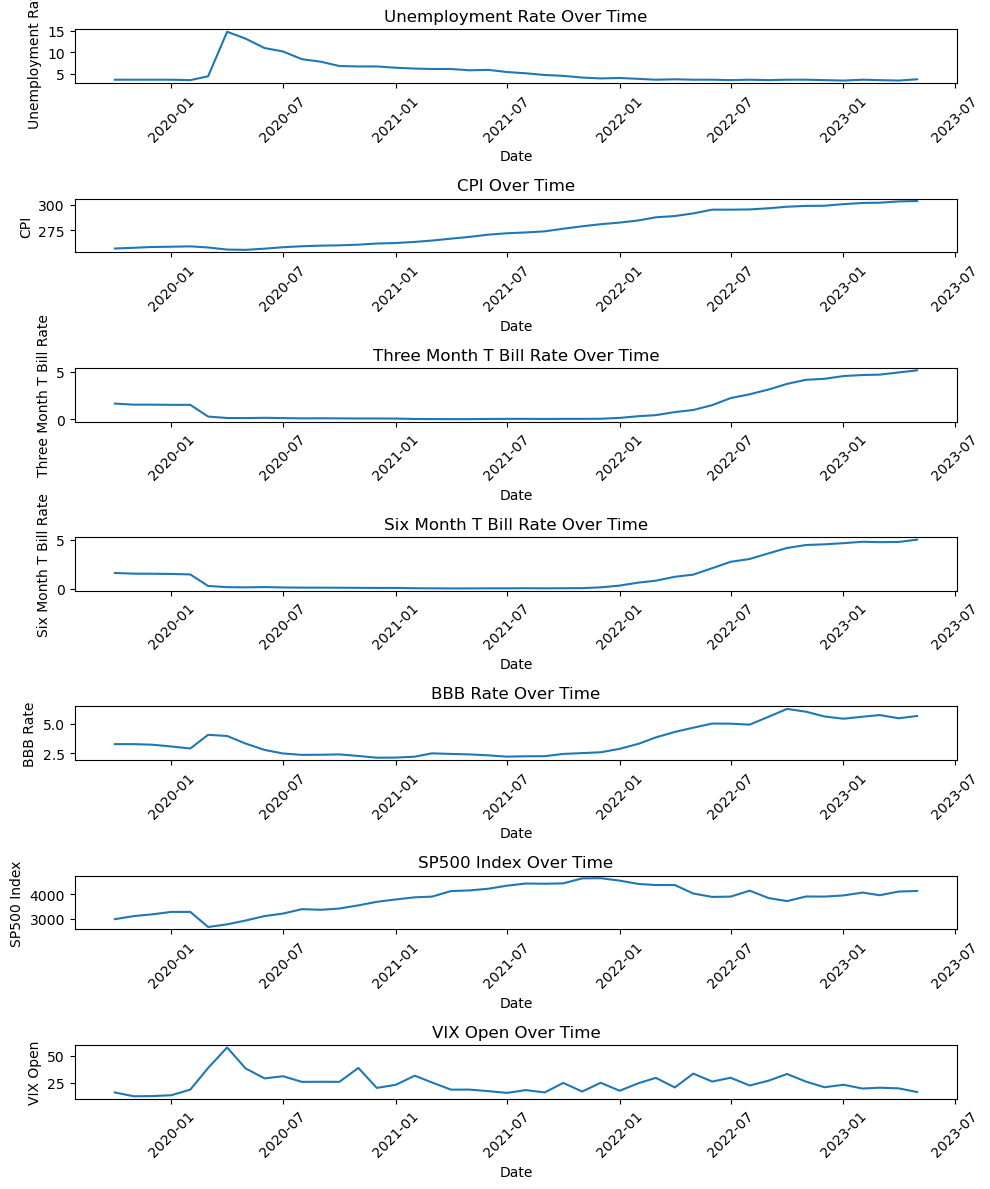

In [68]:
features = merged_data.columns
plt.figure(figsize=(10, 12))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    plt.plot(merged_data.index, merged_data[feature], label=feature)
    plt.title(f'{feature} Over Time')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plot
plt.show()